### 1. Loading data : [Train : 891] + [Test : 418]  
`pd.concat()` 활용

In [1]:
import pandas as pd
train_data = pd.read_csv('train.csv') # train set = 819 개
test_data= pd.read_csv('test.csv')    # test set = 418 개
total_data = pd.concat([train_data, test_data], axis = 0)

### 2.1 데이터 구조 파악

In [2]:
total_data.head(20)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [3]:
total_data?

Type:        DataFrame
String form:
Age        Cabin Embarked      Fare  \
           0    22.0          NaN        S    7.2500
           1    38 <...>     359309
           417       3    male      1       NaN                2668
           
           [1309 rows x 12 columns]
Length:      1309
File:        c:\users\lhj91\anaconda3\lib\site-packages\pandas\core\frame.py
Docstring:  
Two-dimensional size-mutable, potentially heterogeneous tabular data
structure with labeled axes (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a dict-like
container for Series objects. The primary pandas data structure

Parameters
----------
data : numpy ndarray (structured or homogeneous), dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects
index : Index or array-like
    Index to use for resulting frame. Will default to np.arange(n) if
    no indexing information part of input data and no index provided
columns : I

In [148]:
# 데이터 속성, 갯수, 유형 파악
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Age         1046 non-null float64
Embarked    1307 non-null object
Fare        1308 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 92.0+ KB


In [149]:
new_total_data['Pclass'] = new_total_data['Pclass'].astype(object)
new_total_data['Survived'] = new_total_data['Survived'].astype(object)


> #### Data Dictionary

|**Variable** | **Definition** | **변경 전 Type** | **사용유무** | **Key** | **변경 후 Type** |
| :---------: | :------------: | :-------------: | :---------: | :-----: | :-------------: | 
| Age         | Age in years   | float64         | O           | '미성년자' = 0~20 ,  '청년' = 20~30, '중년' = 30~50, '장년 및 노년' = 50~ | Categorical |
| *Cabin*     | Cabin number   | object          | X           |         |  |
| Embarked    | Port of Embarkation | object     | O           | C = Cherbourg, Q = Queenstown, S = Southampton | Categorical 
| Fare        | Passenger fare | float64         | O           |         | Categorical |
| *Name*        |                | object        | X           |
| Parch       | Number of Parents/Children Aboard | int64 | O | |  |
| *PassengerId* |                | int        | X           |         |
| Pclass      | Ticket class   | int          | O           | 1 = 1st, 2 = 2nd, 3 = 3rd | Categorical |
| Sex         | Sex            | object          | O           | 1 = Male, 2 = Female | Categorical |
| SibSp       | Number of Siblings/Spouses Aboard | int64 | O |  |  |
| **Survived**    | Survival       | float          | O           | 0 = No, 1 = Yes | Categorical | 
| *Ticket*      | Ticket number  | object        | X           |    

#### Variable Notes
**pclass**: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 


**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

### 2.2 데이터 전처리 및 Type 변경

#### 1. 사용하지 않는 Variable 삭제

In [153]:
columns = ['Cabin', 'Name', 'PassengerId', 'Ticket']
total_data.drop(columns, inplace = True, axis=1)

In [154]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Age         1046 non-null float64
Embarked    1307 non-null object
Fare        1308 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 92.0+ KB


#### $2.$ 'NA' 값을 가지는 행 삭제.ㅠㅠ

In [155]:
new_total_data = total_data.dropna(axis = 0, how = 'any')

In [156]:
new_total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Age         712 non-null float64
Embarked    712 non-null object
Fare        712 non-null float64
Parch       712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
SibSp       712 non-null int64
Survived    712 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 50.1+ KB


In [161]:
new_total_data.head(20)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22,S,7.2500,0,3,male,1,0
1,38,C,71.2833,0,1,female,1,1
2,26,S,7.9250,0,3,female,0,1
3,35,S,53.1000,0,1,female,1,1
4,35,S,8.0500,0,3,male,0,0
6,54,S,51.8625,0,1,male,0,0
7,2,S,21.0750,1,3,male,3,0
8,27,S,11.1333,2,3,female,0,1
9,14,C,30.0708,0,2,female,1,1
10,4,S,16.7000,1,3,female,1,1


#### $3.$ 데이터 Type 변환

In [157]:
new_total_data['Pclass'] = new_total_data['Pclass'].astype(object)
new_total_data['Survived'] = new_total_data['Survived'].astype(object)

C:\Users\lhj91\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lhj91\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\lhj91\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


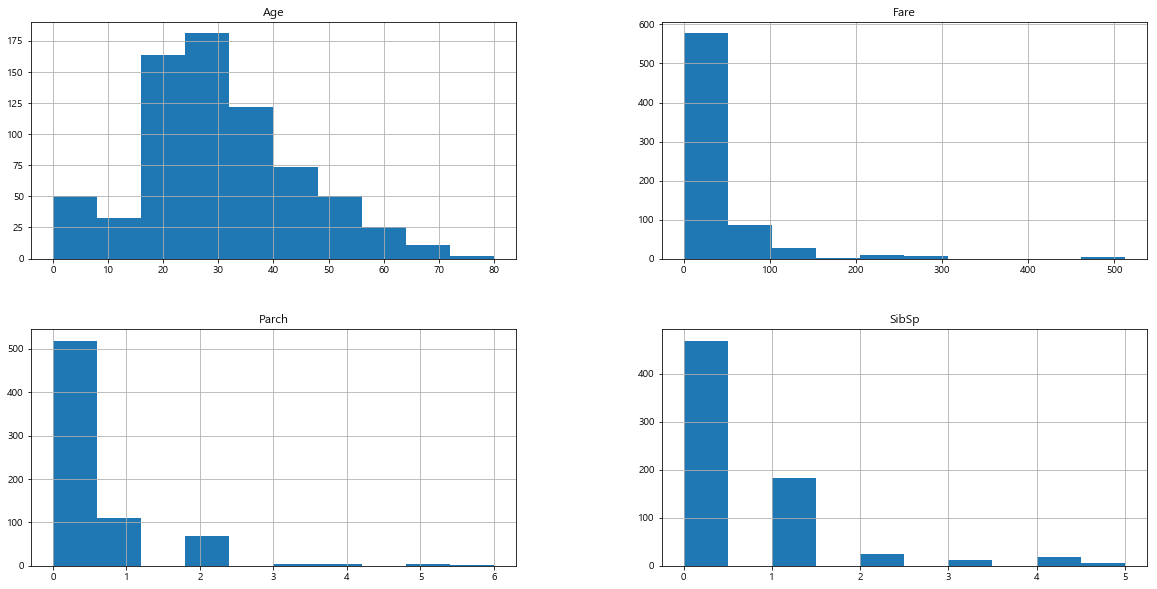

In [158]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# Import matplotlib.pyplot

import matplotlib.pyplot as plt



fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))

# 히스토그램 'Age'
new_total_data['Age'] = new_total_data['Age'].astype(int)
ax1 = new_total_data.hist('Age', ax = axes[0,0])

# 히스토그램 'Fare'
ax2 = new_total_data.hist('Fare', ax = axes[0,1])


# 히스토그램 'Parch'
ax3 = new_total_data.hist('Parch', ax = axes[1, 0])


# 히스토그램 'SibSp'
ax4 = new_total_data.hist('SibSp', ax = axes[1, 1])

plt.show()

In [159]:
new_total_data.describe()

,Age,Fare,Parch,SibSp
count,712.000000,712.000000,712.000000,712.000000
mean,29.622191,34.567251,0.432584,0.514045
std,14.502891,52.938648,0.854181,0.930692
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,8.050000,0.000000,0.000000
50%,28.000000,15.645850,0.000000,0.000000
75%,38.000000,33.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,5.000000


#### 1. [Age]를 범주형 변수로 나눔

In [162]:
bins = [0.0, 20., 30., 50., 80.]
labels = ["미성년자", "청년", "중년", "장년 및 노년"]
Ages = pd.cut(new_total_data['Age'], bins, labels = labels)

In [163]:
pd.value_counts(Ages)

중년         238
청년         231
미성년자       173
장년 및 노년     63
Name: Age, dtype: int64

In [164]:
new_total_data['Age'] = Ages

C:\Users\lhj91\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [165]:
new_total_data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,청년,S,7.2500,0,3,male,1,0
1,중년,C,71.2833,0,1,female,1,1
2,청년,S,7.9250,0,3,female,0,1
3,중년,S,53.1000,0,1,female,1,1
4,중년,S,8.0500,0,3,male,0,0


#### 2. [Fare]를 범주형 변수로 나눔

In [166]:
bins = [0., 10., 15., 33., 513.]
labels = ["1", "2", "3", "4"]
Fares = pd.cut(new_total_data['Fare'], bins, labels = labels)

In [167]:
pd.value_counts(Fares)

1    229
3    185
4    177
2    114
Name: Fare, dtype: int64

#### 3. [Parch]를 범주형 변수로 나눔

In [180]:
bins = [-1, 0, 1, 6]
labels = ["0명", "1명", "2명 이상"]
Parch = pd.cut(new_total_data['Parch'], bins, labels = labels)

In [181]:
pd.value_counts(Parch)

0명       519
1명       110
2명 이상     83
Name: Parch, dtype: int64

#### 4. [SibSp]를 범주형 변수로 나눔

In [182]:
bins = [-1, 0, 1, 7]
labels = ["0명", "1명", "2명 이상"]
SibSp = pd.cut(new_total_data['SibSp'], bins, labels = labels)

In [183]:
pd.value_counts(SibSp)

0명       469
1명       183
2명 이상     60
Name: SibSp, dtype: int64

In [184]:
new_total_data['Age'] = Ages
new_total_data['Fare'] = Fares
new_total_data['Parch'] = Parch
new_total_data['SibSp'] = SibSp

C:\Users\lhj91\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lhj91\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lhj91\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [185]:
new_total_data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,청년,S,1,0명,3,male,1명,0
1,중년,C,4,0명,1,female,1명,1
2,청년,S,1,0명,3,female,0명,1
3,중년,S,4,0명,1,female,1명,1
4,중년,S,1,0명,3,male,0명,0


In [186]:
new_total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Age         705 non-null category
Embarked    712 non-null object
Fare        705 non-null category
Parch       712 non-null category
Pclass      712 non-null object
Sex         712 non-null object
SibSp       712 non-null category
Survived    712 non-null object
dtypes: category(4), object(4)
memory usage: 51.2+ KB


################### 데이터 Type 변경 #########################

### 2.2 Visual exploratory data analysis

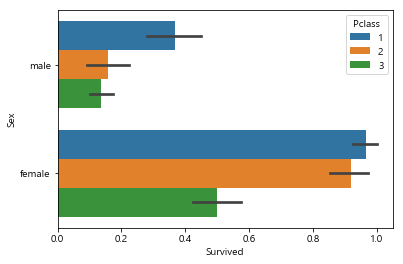

In [12]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# Import matplotlib.pyplot
# 히스토그램
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = 'Survived', y = 'Sex', hue = "Pclass", data = total_data)

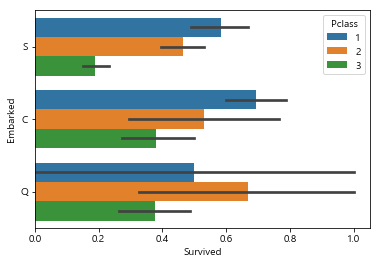

In [9]:
## 비율이 차이카 크기 떄문에 합쳐줄 것임

sns.barplot(x = 'Survived', y = 'Embarked', hue = "Pclass", data = total_data)

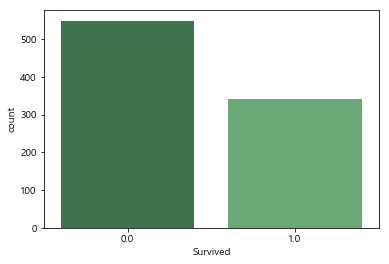

In [11]:
sns.countplot(x = 'Survived', data = total_data, palette="Greens_d");

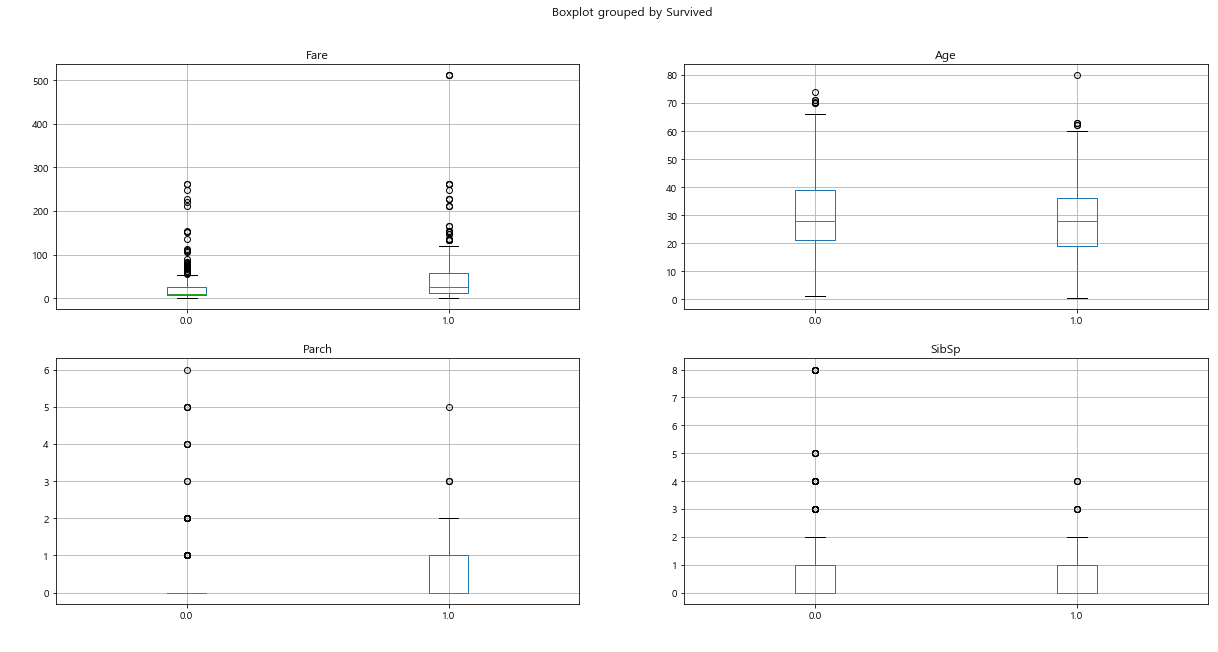

In [15]:
# Import matplotlib.pyplot
# 박스플롯
import matplotlib.pyplot as plt
from pandas.tools.plotting import table
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))

ax1 = total_data.boxplot(column = 'Fare', by = 'Survived', ax = axes[0, 0])
ax1.set_ylabel('Fare', fontsize='20', color = 'white')
ax1.set_xlabel('생존 여부', fontsize='20', color = 'white')

ax2 = total_data.boxplot(column = 'Age', by = 'Survived', ax = axes[0, 1])
ax2.set_ylabel('Age', fontsize='20', color = 'white')
ax2.set_xlabel('생존 여부', fontsize='20', color = 'white')


ax3 = total_data.boxplot(column = 'Parch', by = 'Survived', ax = axes[1, 0])
ax3.set_ylabel('Parch', fontsize='20', color = 'white')
ax3.set_xlabel('생존 여부', fontsize='20', color = 'white')

ax4 = total_data.boxplot(column = 'SibSp', by = 'Survived', ax = axes[1, 1])
ax4.set_ylabel('SibSp', fontsize='20', color = 'white')
ax4.set_xlabel('생존 여부', fontsize='20', color = 'white')

plt.show()

### 3. Anomly Detection

### 4. 데이터를 TRAIN 65%, TEST 35% 로 분할

In [ ]:
import trees
